In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the dataset
data= pd.read_csv('ratings.csv')

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# Explore the ratings in the dataset
data.rating.value_counts()
# rating4    34174 : paling bannyak diikuti rating3, rating5

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

<AxesSubplot:>

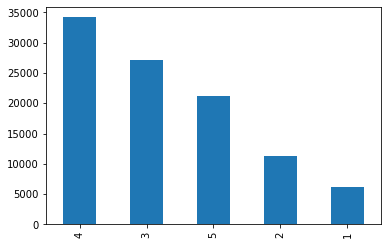

In [5]:
# Plotting bar chart showing ratins information
data.rating.value_counts().plot(kind= 'bar')

In [6]:
# Display general information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
# Check if there is any NULL values in the dataset
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
# Further Data Pre-processing
# Remove timestamp column
data= data.iloc[:, :-1]

In [9]:
data.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [10]:
# Import the Reader Class- parse a file containing ratings

from surprise import Reader, Dataset
reader= Reader() # ubah : rating_scale=(1, 5) defaut, kebetulan kita pun ada rating1-rating5
data= Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader) # column, tranform into reader class

In [11]:
# Train/Test split

from surprise.model_selection import train_test_split
trainset, testset= train_test_split(data, test_size= 0.25)

In [12]:
# Fitting training set
from surprise import SVD, accuracy
algo= SVD()
algo.fit(trainset)

In [13]:
# Predicting using test set
predictions= algo.test(testset)

In [14]:
# Caluclate accuracy
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.9441


0.9440904972923777